# 【点滴】学习强化学习

## 1 Q-Learning Agent

Q-Learning 方法是强化学习算法家族中的一个经典算法，它有别于目前应用更加广泛的基于策略的强化学习算法，但是是入门强化学习的很好的基础。因此，整个学习路线是：首先弄懂Q-Learning的原理，完成其最基础的实现（look-up table），然后以神经网络为元件实现Q-Learning，再进入policy-based方法的学习，逐渐进入前沿强化学习方法领域。

强化学习中包含两种主流算法，基于策略的算法是直接学习如何将一个状态映射为一个动作；基于状态（动作）价值的算法则是学习每个经历状态的效益值，或者状态-动作对的效益值，然后基于该效益值筛选动作。可以看到，尽管两个方法最终都实现同一个目标——为给定状态选择合适的动作，但它们的完成方式有显著的区别。

本小节将首先以OpenAI Gym提供的[FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/)环境为研究案例。OpenAI Gym提供了一系列简单的强化学习应用场景，方便人们测试自己的算法。在Frozen Lake中，智能体将被放入一个4\*4的网格阵，每个网格对应一定的特性：

<center>
    <img style="border-radius: 0.3125em;
    box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);" 
    src="https://miro.medium.com/max/1050/1*MCjDzR-wfMMkS0rPqXSmKw.png">
    <br>
    <div style="color:orange; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 2px;">FrozenLake环境示意图</div>
</center>

智能体在该环境的学习目标是：从起始方块（S）出发，到达目标方块（G），过程中可以经过安全方块（F），但需要避免进入危险方块（H）。智能体每一步都可以选择上下左右其中一个方向前进，但有一定概率受到“风”的影响，导致随机前进到一个方块。因此，不可能每次都完成最优的出行，但学习如何安全到达安全方块是可行的。在该环境中，每一步前进的奖赏都是0，唯有到达目标方块后获得奖赏1。

Frozen Lake可以说是一个最基础的强化学习体验案例，因为它的起始状态与终止状态都固定，且状态空间（一维16个取值）与动作空间（一维4个取值：上/下/左/右）足够小。

最简单的Q-Learning实现方式是构造一个记录状态-动作对价值的表格（Q-Table）。在该表格中，每行代表一个状态，每列代表一个动作。在Frozen Lake这个案例中，Q-Table大小是16\*4，即需要学习出16\*4个状态-动作对的价值，最后根据这些价值选择合适的动作。首先，需要将Q-Table所有值初始化为0，然后根据智能体在该环境的经历，不断更新Q-Table的各个值。采用经典的[Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation) 去更新表格：以下是基于Q-Table的Q-Learning实现：

Eq(1): $ Q(s,a)=r+\lambda (\mathop {\max }\limits_{a'} (Q(s',a')))$

其中，
$Q(s,a)$表示状态-动作对（s，a）的收益；r表示在状态s执行动作a的即时奖赏；$Q(s',a')$ 表示在状态s执行动作a后到达下一状态的收益；$\lambda$是折扣系数，允许我们确定当前奖赏和未来收益之间的重要性。上式说明的是，**当前状态-动作对（s，a）的期望收益等于当前获得的奖赏加上最好的长期效益**。这种更新方法使得每一次更新都重新使用了之前的更新结果，是一个迭代的过程。



In [3]:
import gym
import numpy as np
env = gym.make('FrozenLake-v0')

[[1.67500456e-04 9.78456330e-02 2.72223444e-04 3.37446997e-04]
 [1.04062086e-05 1.66738822e-05 1.81889254e-05 4.49573617e-02]
 [2.03219302e-05 1.18330181e-04 2.43686809e-05 1.18771185e-02]
 [1.21114558e-05 1.37007786e-05 7.37863675e-06 2.99169155e-03]
 [1.12936257e-01 7.53579829e-05 5.56291827e-05 2.27711092e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.26176016e-07 2.80480342e-08 1.01975389e-02 3.15001685e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.71615877e-06 6.17120549e-05 3.50345412e-05 1.17501844e-01]
 [6.05794953e-05 4.85933341e-01 3.14152940e-05 3.00864925e-05]
 [6.40997119e-02 3.92317816e-06 1.52894792e-07 4.17809373e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.84368982e-05 0.00000000e+00 9.98625765e-02 1.20424407e-03]
 [0.00000000e+00 0.00000000e+00 9.63185330e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

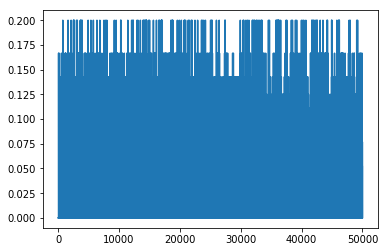

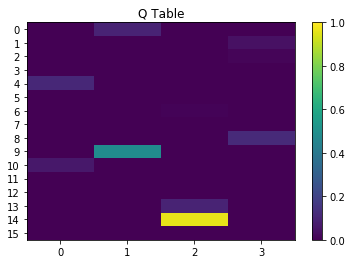

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

Qt = np.zeros([env.observation_space.n,env.action_space.n])

lr = 0.9
lam = 0.95
num_episodes = 50000
rAlllist=[]
for i in range(num_episodes):
    s = env.reset()
    j = 0
    max_steps_in_episode = 99
    rAll=0.
    
    while j<max_steps_in_episode:
        # action[0:Left ## 1:Down ## 2:Right ## 3:Up]
        if i<48000:
            a = np.argmax(Qt[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        else:
            a = np.argmax(Qt[s,:])
        s_next, r, d,_ = env.step(a)
        Qt[s,a] = Qt[s,a] + lr*(r+lam*np.max(Qt[s_next,:])-Qt[s,a])
        s = s_next
        rAll+=r
        if d==True:
            break
        j+=1
    rAlllist.append(rAll/j)
    
print(Qt)
plt.figure(1)
plt.plot(rAlllist)
plt.figure(2)
plt.title('Q Table')       
plt.xticks(np.arange(0,env.action_space.n,1.0))
plt.yticks(np.arange(0,env.observation_space.n,1.0))
plt.imshow(Qt, interpolation='none',aspect='auto')
plt.colorbar()
plt.clim(0,1)
plt.show()

[[67. 57. 55. 39.]
 [70.  0. 36.  0.]
 [72. 73. 35.  0.]
 [ 0. 74. 76. 77.]]


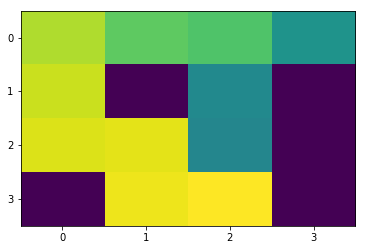

In [63]:
%matplotlib qt5
s = env.reset()
route=np.zeros([4,4])
if s_next<4:
    i=0
    j=s_next
else:
    i = int(s_next/4)
    j = s_next%4
route[i,j]=1
step=1
d=False
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()

while d==False:
    ax.clear()
    plt.xticks(np.arange(0,4,1.0))
    plt.yticks(np.arange(0,4,1.0))
    ax.imshow(route, interpolation='none',aspect='auto')
    fig.canvas.draw()
    plt.pause(0.3)
    a = np.argmax(Qt[s,:])
    s_next, r, d,_ = env.step(a)
    step+=1
    if s_next<4:
        i=0
        j=s_next
    else:
        i = int(s_next/4)
        j = s_next%4
    route[i,j]=step
    s = s_next

print(route)

---

很容易可以想到：当状态空间和动作空间非常大时，Q-Table往往要求庞大的存储空间，且不够灵活，为了降低存储消耗，我们可以通过构造一个函数去估计Q-Table，神经网络是一个常见且有效的选择，利用神经网络去充当估计器，我们可以通过构造（特征）向量表示任意状态，作为神经网络的输入，然后让网络学习状态对应的效益值。

在本小节的案例中，我们可以通过one-hot向量去描述(输入)状态：: $s\in R^{1x16}$,而对应的输出则是该状态下，执行每个可选动作的效益值：$Q\in R^{1x4}$。在神经网络中，我们通过梯度下降优化损失函数的方式进行“Q-Table”的更新学习，对应的损失函数为：

Eq(2): $Loss=\sum (Q_{target}-Q_{estimate})^2$

$Q_{target}=r+\lambda (\mathop {\max }\limits_{a'} (Q_{estimate}(s',a'))))$

实际上，在处理FrozenLake问题时，神经网络并不比Q-Table方法来的多高效。同时需要指出，尽管利用神经网络拟合Q值为描述Q值带来了更大的灵活性，但该方法在进行Q-Learning时稳定性不佳。目前有大量基于神经网络进行Q-Learning的扩展研究，目的就是为了寻求一个更好更稳定的Q值估计，在这些研究中，比较著名的是**Experience Replay**和**冻结目标网络**两个机制：

**Experience Replay**

**冻结目标网络**

**Q-Network Approach in Tensorflow**

### 参考资料

[1][Simple Reinforcement Learning with Tensorflow Part 0: Q-Learning with Tables and Neural Networks](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)

[2][DEMYSTIFYING DEEP REINFORCEMENT LEARNING](https://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/)